Contents of the notebook:
1. Look at a few pythonic examples of how you can analyze and visualize data.
1. Simulate a few regularities concerning convergence of sample means. 
1. Make a few more experiments showing how different distributions arise.
1. Take look at the distribution of some financial data. 

You will have to just click throug these sections and play with them a little.

And after that, there will be the actual work to do: describe the distribution of two more financial variables. 


# 1. A few examples of what can you compute with data and distributions

**What can you do with random variables**:
* calculate their cdf, quantiles, moments, etc from data - or from formulas
* visualize data samples and populations
* sample data from distribution formulas
* fit distribution formulas to data samples

That's what we'll try here. We'l use the libraries `matplotlib`, `numpy`, `scipy` and `pandas`, which must be installed beforehand - e.g. using `pip` or `conda` package managers from command line. 

In [1]:
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt
%matplotlib inline

## Calculating distribution properties

#### This is how distribution properties can be calculated from data

In [2]:
data = [1, 2, 3, 4, 9, 10, 11, 17, 30, 49, 121, 289, 503]

In [3]:
# moments
print(np.mean(data))
print(np.std(data))
print(scipy.stats.skew(data))
print(scipy.stats.kurtosis(data))

80.6923076923077
144.2345230280743
2.0771804369778044
3.0325590245663427


In [4]:
# linearly interpolated quantiles: min, 25% quantlie, median, 75% quantile, max
print(np.percentile(data, [0, 25, 50, 75, 100]))

[  1.   4.  11.  49. 503.]


#### And here these properties are calculated from population formulas

Scipy has a special family of objects that represent distributions and have lots of interesting methods. 

See more details in https://docs.scipy.org/doc/scipy/reference/stats.html

In [5]:
# formula for a normal with mean 90 and standard deviation 100
distribution = scipy.stats.norm(loc=90, scale=100)
print(type(distribution))

<class 'scipy.stats._distn_infrastructure.rv_frozen'>


In [6]:
# analytical moments (someone took the integrals for you)
print(distribution.mean())
print(distribution.std())
print(distribution.stats('mvsk')) # mean, variance, skewness and kurtosis

90.0
100.0
(array(90.), array(10000.), array(0.), array(0.))


In [7]:
# cdf at different points
print(distribution.cdf([10, 100, 200]))
# cdf at different points
print(distribution.pdf([10, 100, 200]))

[0.2118554  0.53982784 0.86433394]
[0.00289692 0.00396953 0.00217852]


In [8]:
# quantiles at different percentages
print(distribution.ppf([0.05, 0.5, 0.8, 0.95, 0.999]))

[-74.4853627   90.         174.16212336 254.4853627  399.02323062]


## Visualization

The most frequently used plot for distributions is histogram

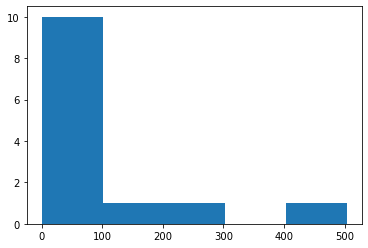

In [9]:
plt.hist(data, bins=5);

Sometimes a histogram with unequal bins can be more informative - but don't forget to normalize it!

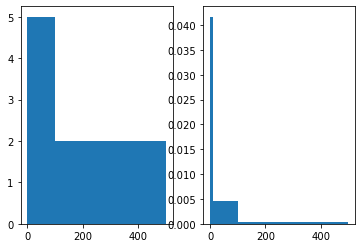

In [10]:
bins = [0, 10, 100, 500]
plt.subplot(1,2,1)
plt.hist(data, bins=bins);
plt.subplot(1,2,2)
plt.hist(data, bins=bins, density=True);

To visualize (something like) the CDF of a dataset, you can plot the variable again its cumulative probability in a dataset.

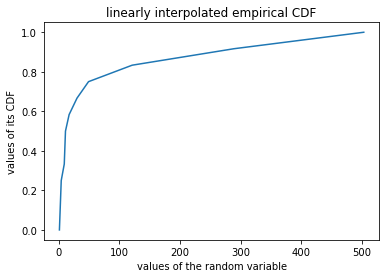

In [12]:
plt.plot(sorted(data), np.linspace(0, 1, num=len(data)))
plt.xlabel('values of the random variable')
plt.ylabel('values of its CDF')
plt.title('linearly interpolated empirical CDF');

You can plot a kernel density estimate (with normal, a.k.a. gaussian kernel).

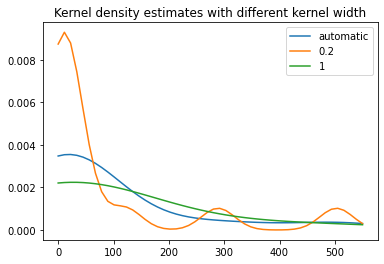

In [13]:
grid = np.linspace(0, 550)
bandwidths = [None, 0.2, 1]
for bw in bandwidths:
    kde = scipy.stats.kde.gaussian_kde(data, bw_method=bw)
    plt.plot(grid, kde.evaluate(grid));
bandwidths[0] = 'automatic'
plt.legend(bandwidths)
plt.title('Kernel density estimates with different kernel width');

We can show how different methods of density estimation work with one more example.

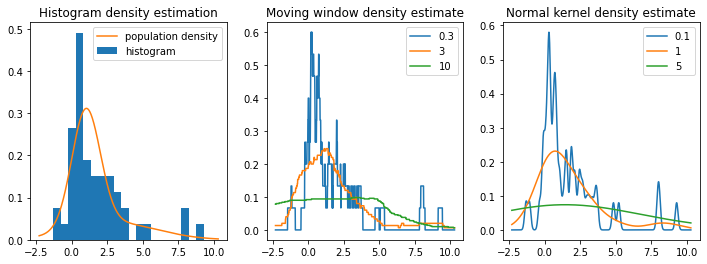

In [14]:
np.random.seed(1)
plt.figure(figsize=(12, 4))
plt.subplot(1,3,1)

x = np.concatenate([
    np.random.normal(loc=1, scale=1, size=35), 
    np.random.normal(loc=3, scale=3, size=15)
])
plt.hist(x, bins=20, density=True);
grid = np.linspace(x.min() - 1, x.max() + 1, 1000)
plt.plot(
    grid,
    scipy.stats.norm.pdf(grid, loc=1, scale=1)*0.7 
    + scipy.stats.norm.pdf(grid, loc=3, scale=3)*0.3
)
plt.legend(['population density', 'histogram'])
plt.title('Histogram density estimation');

plt.subplot(1,3,2)
scales = [0.3,  3, 10]
for scale in scales:
    density = sum((np.abs(xi-grid) < scale * 0.5) / scale for xi in x) / len(x)
    plt.plot(grid, density);
plt.title('Moving window density estimate');
plt.legend(scales);

plt.subplot(1,3,3)
scales = [0.1,  1, 5]
for scale in scales:
    density = sum(scipy.stats.norm(xi, scale=scale).pdf(grid) for xi in x) / len(x)
    plt.plot(grid, density);
plt.title('Normal kernel density estimate');
plt.legend(scales);

And one more example of looking at log scale for PDF and CDF

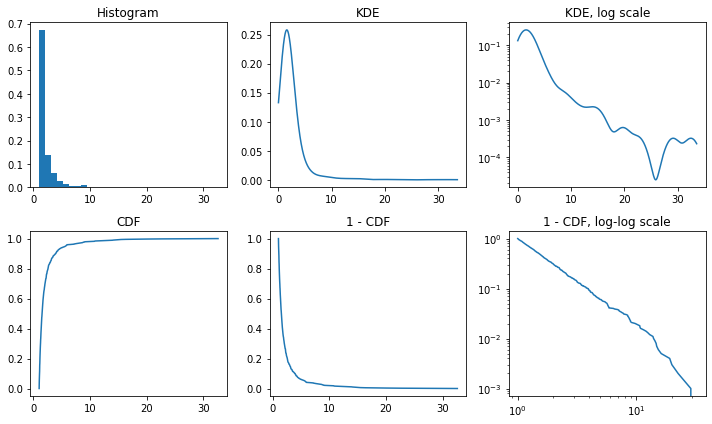

In [15]:
np.random.seed(1)
pareto_x = scipy.stats.pareto.rvs(1.7, size=1000)
x_d = np.linspace(0, pareto_x.max() + 1, 1000)
density = scipy.stats.kde.gaussian_kde(pareto_x, bw_method=0.5).evaluate(x_d)

plt.figure(figsize=(10, 6))
plt.subplot(2,3,1)
plt.hist(pareto_x, bins=30, density=True)
plt.title('Histogram')

plt.subplot(2,3,2)
plt.plot(x_d, density)
plt.title('KDE')

plt.subplot(2,3,3)
plt.plot(x_d, density)
plt.yscale('log')
plt.title('KDE, log scale')

xs = np.array(sorted(pareto_x))
q = np.linspace(0, 1, num=len(pareto_x))

plt.subplot(2,3,4)
plt.plot(xs, q)
plt.title('CDF')

plt.subplot(2,3,5)
plt.plot(xs, 1-q)
plt.title('1 - CDF')

plt.subplot(2,3,6)
plt.plot(xs, 1-q)
plt.yscale('log')
plt.xscale('log')
plt.title('1 - CDF, log-log scale')

plt.tight_layout();

A brief way to plot several distribution is `boxplot` - it shows mean, 25% and 75% quantiles, range that contains most data ("whiskers"), and outliers.

In [16]:
data1 = [1, 2, 4, 8, 12, 19, 23, 3, 54, 32, 1, 39]
data2 = [3, 5, 32, 54, 8, 32, 2, 4, 42]

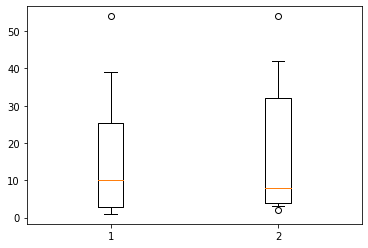

In [17]:
plt.boxplot([data1, data2], whis=[5, 95]);

A violinplot shows roughly the same, but it just more fancy. 

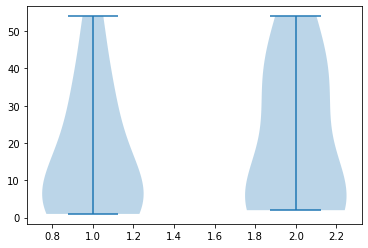

In [18]:
plt.violinplot([data1, data2]);

Bivariate data can be visualized as a scatterplot

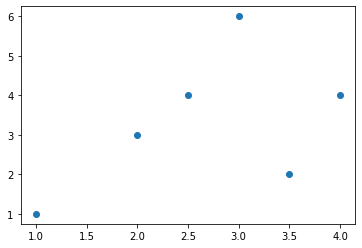

In [19]:
pairs1 = [1, 2, 3, 4, 2.5, 3.5]
pairs2 = [1, 3, 6, 4, 4, 2]
plt.scatter(pairs1, pairs2);

Or you can plot a "genuine" (from a population, instead of a dataset) PDFs or CDFs.

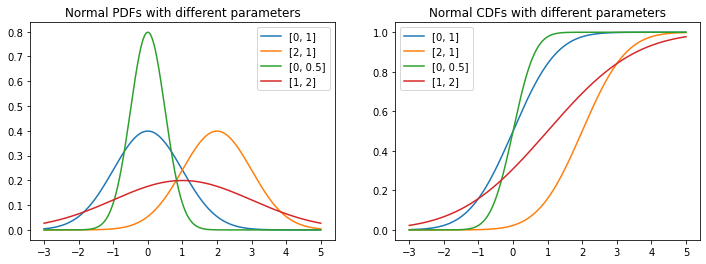

In [20]:
x = np.linspace(-3, 5, num=1000)
parameters = [[0, 1], [2, 1], [0, 0.5], [1, 2]]
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
for mu, sigma in parameters:
    plt.plot(x, scipy.stats.norm(mu, sigma).pdf(x))
plt.legend(parameters)
plt.title('Normal PDFs with different parameters')
plt.subplot(1,2,2)
for mu, sigma in parameters:
    plt.plot(x, scipy.stats.norm(mu, sigma).cdf(x))
plt.legend(parameters)
plt.title('Normal CDFs with different parameters');

Probability plot, a.k.a. quantile-quantlie plot, is a great way to see how well some distribution family fits to a dataset.

If the fit is good, then most dots will lie close to the diagonal.

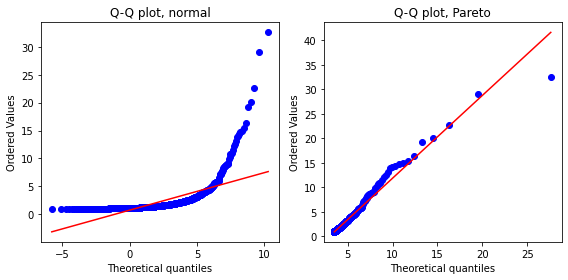

In [21]:
plt.figure(figsize=(8, 4))
plt.subplot(1,2,1)
scipy.stats.probplot(pareto_x, dist=scipy.stats.norm, sparams=(pareto_x.mean(), pareto_x.std()), plot=plt)
plt.title('Q-Q plot, normal')
plt.subplot(1,2,2)
scipy.stats.probplot(pareto_x, dist=scipy.stats.pareto, sparams=(pareto_x.mean(), pareto_x.std()), plot=plt)
plt.title('Q-Q plot, Pareto');
plt.tight_layout()

## The assignment : visualize the distribution of word frequencies

Let's calculate frequencies of all words from the previous homework. 

Your need to visualize the distribution of words frequencies (e.g. plot a histogram of them, or plot their CDF, in an appropriate scale). 

An additional question: from what family of probability distributions this data might have been generated?

In [22]:
%%capture
!wget https://raw.githubusercontent.com/avidale/ps4ds2019/master/homework/week1/spam_classifier/SMSSpamCollection

In [23]:
import re
import pandas as pd 
from collections import Counter
data = pd.read_csv('SMSSpamCollection', sep='\t', header=None)
data.columns = ['target', 'text']
words_frequencies = pd.Series(Counter(word for sent in data.text for word in re.split('\W+', sent.lower()) if word))

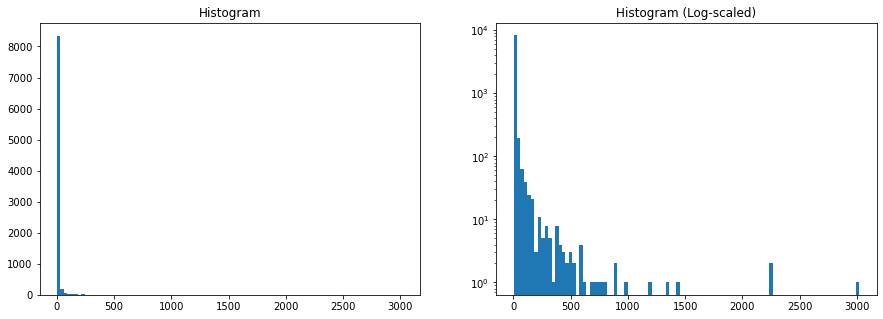

In [77]:
# todo: visualize the distribution of word frequencies
f = plt.figure(figsize=(15, 5))

plt.subplot(1,2,1)
plt.hist(words_frequencies, bins=100)
plt.title('Histogram');

plt.subplot(1,2,2)
plt.hist(words_frequencies, bins=100)
ax = f.get_axes()[1]
ax.set_yscale('log')
plt.title('Histogram (Log-scaled)');

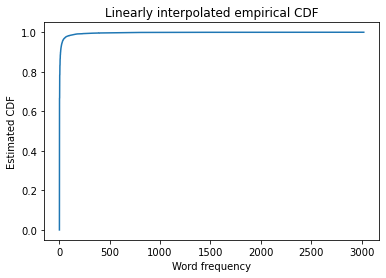

In [211]:
plt.plot(sorted(words_frequencies), np.linspace(0, 1, num=len(words_frequencies)))
plt.xlabel('Word frequency')
plt.ylabel('Estimated CDF')
plt.title('Linearly interpolated empirical CDF');

# 2. Simulation of the Central Limit Theorem and Law of Large Numbers

The CLT states that sum of any 𝑛 (approximately) independent and (approximately) identical random variables will converge to normal distribution, as we increase 𝑛.

### How CLT looks like

You can take (almost) any distribution. The distribution may have any shape. 

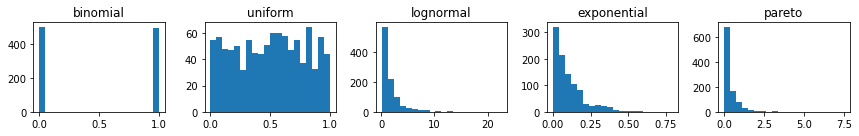

In [78]:
np.random.seed(41)
samples = {'binomial':[], 'uniform':[], 'lognormal':[], 'exponential':[], 'pareto':[]}
ns = [1, 3, 10, 30, 100, 300, 1000, 3000]
for n in ns:
    samples['binomial'].append(np.random.binomial(n=1, p=0.5, size = (1000,n)).sum(axis = 1))
    samples['uniform'].append(np.random.uniform(size = (1000,n)).sum(axis = 1))
    samples['lognormal'].append(np.random.lognormal(0,1, size = (1000,n)).sum(axis = 1))
    samples['exponential'].append(np.random.exponential(0.1, size = (1000,n)).sum(axis = 1))
    samples['pareto'].append(np.random.pareto(3.5, size = (1000,n)).sum(axis = 1))
    
plt.figure(figsize=(12, 2))
for i, name in enumerate(samples):
    plt.subplot(1, 5, i+1)
    plt.hist(samples[name][0], bins = 20)
    plt.title(name)
plt.tight_layout()

But when you make a large sample from this distribution and calculate its average, it starts looking like normal. Independently of the original shape!

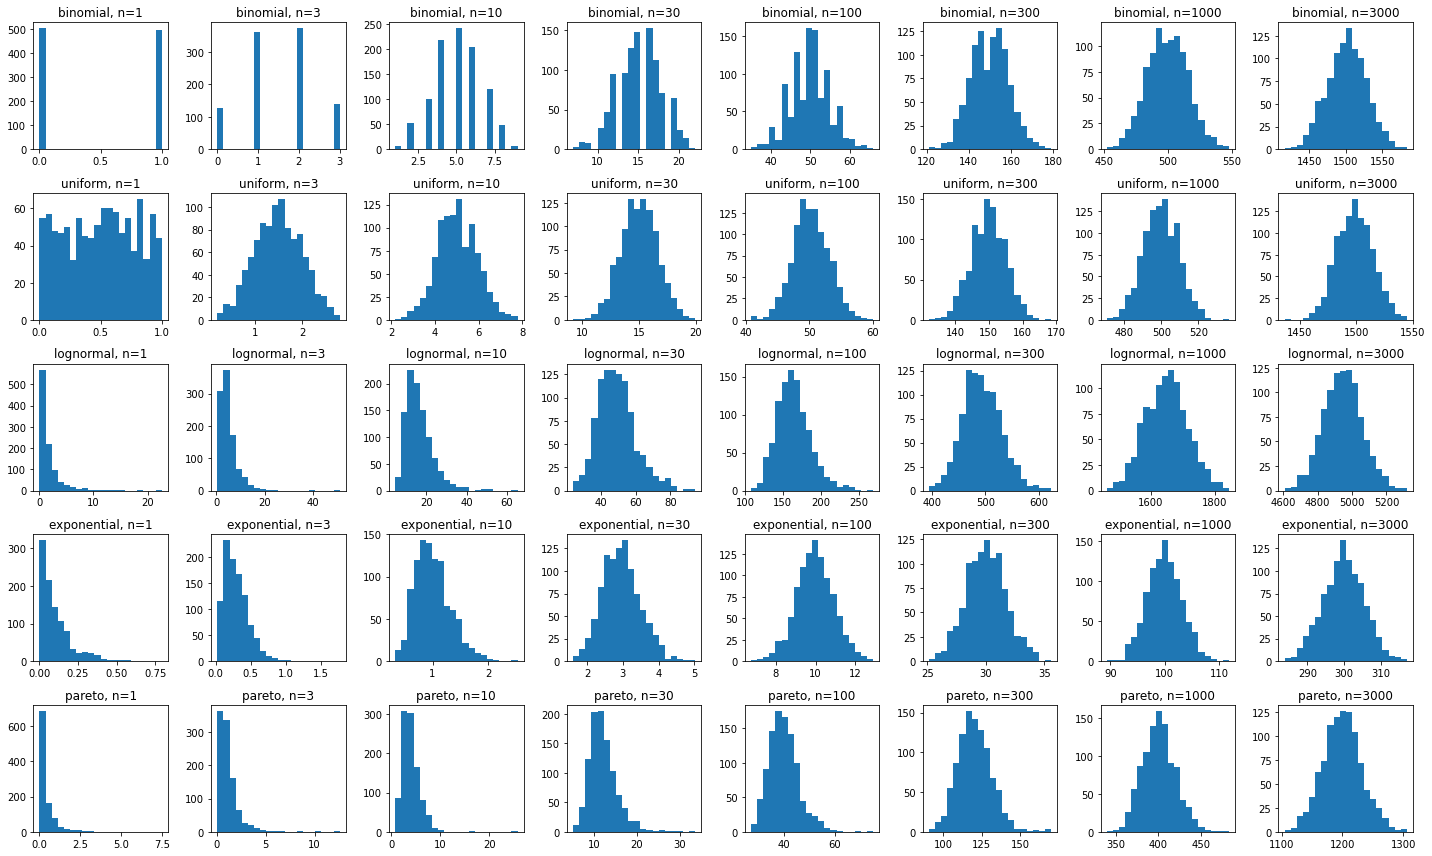

In [79]:
plt.figure(figsize=(20, 12))
for j, n in enumerate(ns):
    for i, name in enumerate(samples):
        plt.subplot(5, len(ns), i*len(ns)+1+j)
        plt.hist(samples[name][j], bins = 20)
        plt.title('{}, n={}'.format(name, n))
plt.tight_layout()

### When CLT works

In brief - when the underlying individual random variables have mean and variance themselves, then sampling sum converges to normal distribution.

As an example, we can sample longer and longer sums from the exponential distribution. 

Let's track how the different sample moments converge and/or diverge when we add lots of random variables together.

n=   1, mean=   0.999, std.dev= 0.999, skewness= 1.968, excess kurtosis= 5.663
n=   2, mean=   1.998, std.dev= 1.410, skewness= 1.393, excess kurtosis= 2.868
n=   3, mean=   2.995, std.dev= 1.724, skewness= 1.148, excess kurtosis= 1.956
n=  10, mean=  10.000, std.dev= 3.168, skewness= 0.648, excess kurtosis= 0.637
n=  50, mean=  49.994, std.dev= 7.081, skewness= 0.280, excess kurtosis= 0.132
n= 100, mean= 100.026, std.dev= 9.962, skewness= 0.201, excess kurtosis= 0.062
n=1000, mean=1000.207, std.dev=31.686, skewness= 0.042, excess kurtosis=-0.002


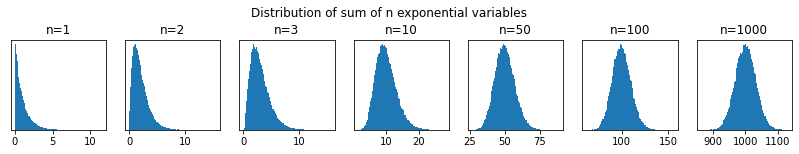

In [81]:
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt
%matplotlib inline


def simulate_clt(distribution, size=100000, sample_sizes=(1, 2, 3, 10, 50, 100, 1000)):
    plt.figure(figsize=(14,2))
    np.random.seed(1)
    for i, n in enumerate(sample_sizes):
        sample_sum = distribution.rvs(size=(size, n)).sum(axis=1)
        plt.subplot(1, len(sample_sizes), i+1)
        plt.hist(sample_sum, bins=100);
        plt.yticks([])
        plt.title('n={}'.format(n))
        # TODO: calculate the first 4 moments for our random variable sample_sum
        # if you do it correctly, mean and variance in this example should diverge, and skewness and kurtosis - converge. 
        mean = np.mean(sample_sum)
        std_deviation = np.std(sample_sum)
        skewness = scipy.stats.skew(sample_sum)
        excess_kurtosis = scipy.stats.kurtosis(sample_sum)
        print('n={:4}, mean={:8.3f}, std.dev={:6.3f}, skewness={:6.3f}, excess kurtosis={:6.3f}'.format(
            n, mean, std_deviation, skewness, excess_kurtosis))
    plt.subplots_adjust(top=0.75)
    
distribution = scipy.stats.expon()
simulate_clt(distribution)
plt.suptitle('Distribution of sum of n exponential variables');

Another law of <s>nature</s> mathematics is the law of large numbers: it says that the mean of a large sample converges to the expected value of population from which the sample was taken.

Let's try to simulate it as well!

In [82]:
def plot_sequential_sample(distribution, size=(500, 10000)):
    np.random.seed(1)
    sequential_sample = np.cumsum(distribution.rvs(size=size), axis=1)
    sequential_sample /= np.arange(sequential_sample.shape[1]) + 1
    plt.figure(figsize=(12,4))
    plt.subplot(1,2,1)
    plt.plot(sequential_sample.T, linewidth=0.2, color='k')
    plt.xlabel('sample size')
    plt.ylabel('sample mean')
    plt.subplot(1,2,2)
    plt.plot(sequential_sample.T, linewidth=0.2, color='k')
    plt.xlabel('sample size')
    plt.ylabel('sample mean')
    plt.xscale('log')
    if sequential_sample.min() > 0:
        plt.yscale('log')

Start with the same exponential distribution

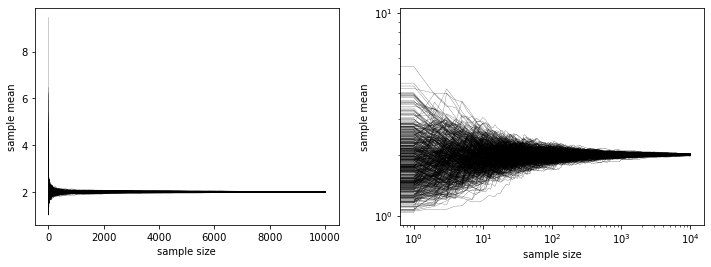

In [83]:
plot_sequential_sample(scipy.stats.expon(1))

However, with more capricious Pareto distribution (with low values of the shape parameter) the law of large numbers seems to fail: instead of convergence, more and more outliers emerge. 

Moreover, instead of stabilizing, sample means grow (and with overwhelming speed!) when we increase sample size. 

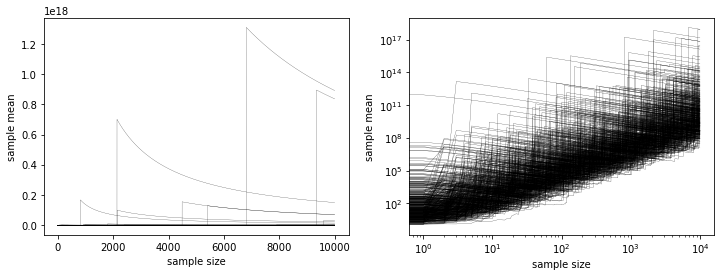

In [84]:
plot_sequential_sample(scipy.stats.pareto(b=0.3))

The central limit theorem as well doesn't seem to work with this distribution. 

n=   1, mean=521386768075.276, std.dev=161614789406557.344, skewness=316.136, excess kurtosis=99957.923
n=   2, mean=3927544600357.823, std.dev=1223698507733866.250, skewness=316.200, excess kurtosis=99985.405
n=   3, mean=146237124318429.625, std.dev=45553442330594280.000, skewness=316.158, excess kurtosis=99967.349
n=  10, mean=21906884900861236.000, std.dev=5204584075947059200.000, skewness=259.699, excess kurtosis=70891.476
n=  50, mean=186600771705139584.000, std.dev=38725533155017007104.000, skewness=222.605, excess kurtosis=49781.693
n= 100, mean=26243271031219269632.000, std.dev=5551216668277306556416.000, skewness=247.397, excess kurtosis=64449.957
n=1000, mean=274839359079576698880.000, std.dev=49375124742011095089152.000, skewness=262.918, excess kurtosis=75180.226


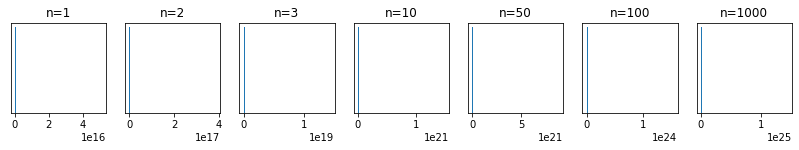

In [85]:
simulate_clt(scipy.stats.pareto(b=0.3))

## The assignment

For what parameters of Pareto distribution the Law of large numbers (not CLT!) works, and for what parameters it does not?

Make a guess and try to demonstrate its correctness.

** todo ** : your guess here

My guess - As closer as the alpha gets to zero (and is less then 1), the law of large numbers won't work well.

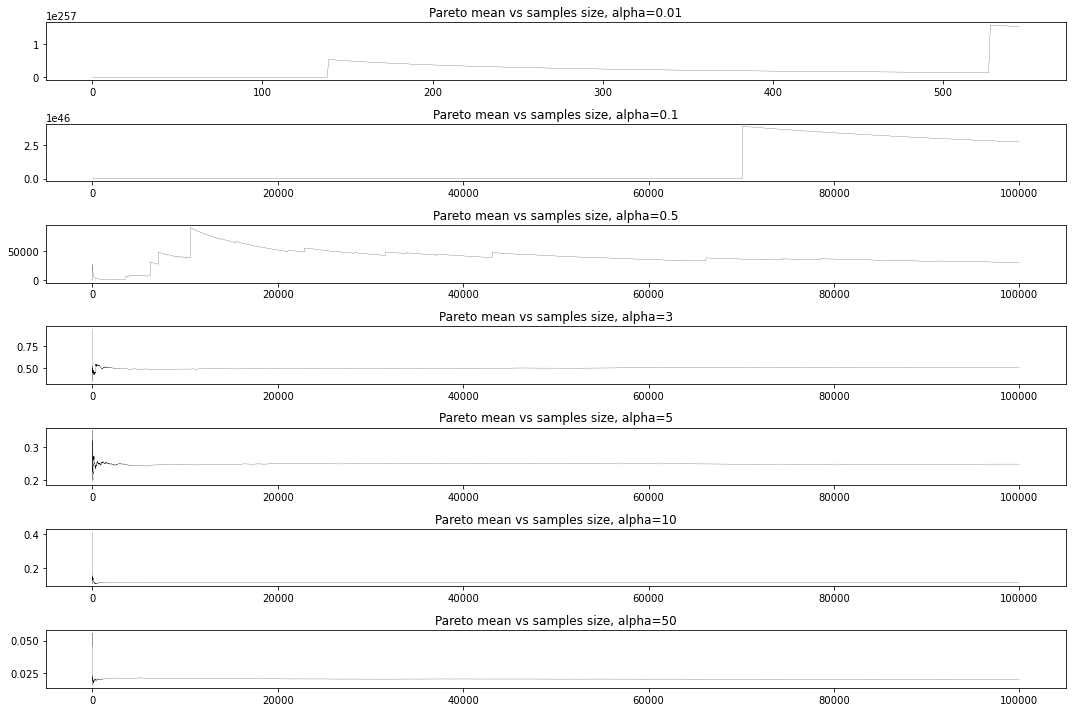

In [115]:
# todo: your code here

samples = {0.01: [], 
           0.1: [], 
           0.5: [], 
           3:[],
           5: [],
           10: []}
alphas = [0.01, 0.1, 0.5, 3, 5, 10, 50]
sampling_size = 100000

for a in alphas:
    samples[a] = np.random.pareto(a, size = (sampling_size,1))
    
plt.figure(figsize=(15, 10))
for i, alph in enumerate(samples):
    mean_samples = []
    for sub in range(1, sampling_size):
        data = samples[alph][:sub]
        mean_samples.append(np.mean(data))
    plt.subplot(len(alphas), 1, i+1)
    plt.plot(mean_samples, linewidth=0.2, color='k')
    plt.title(f"Pareto mean vs samples size, alpha={alph}")
plt.tight_layout()

# 3. A few more random processes

This section just shows you how different distributions can arise from simple random processes. 

### Reproduction of bacteria and lognormal distribution

Normal distribution emerges as a result of adding multiple similar variables. But sometimes in nature and in society we observe *multiplication* of random variables. In this case, resulting distribution may be lognormal. 

For example, let's consider a population of bacteria in a cup of broth. In favorable environments, they never die, and every bacterium every minute divides in two with probability 50%. In the first minute, there is only one bacterium. 

Q: What will be the distribution of number of bacteria in half an hour?

A: It seems that it will be lognormal, because on average the number of bacteria is multiplied by 1.5 on every minute. 

In [ ]:
# let's write a function that generates bacteria!
def plot_germs(minutes=30, initial=1, p_divide=0.5):
    numbers_after_30_minutes = []
    # try it 10K times
    for i in range(10000):
        number_of_germs = initial
        for t in range(minutes):
            # all bacteria divide independently, so the number of successes (divisions) has binomial distribution
            number_of_germs += np.random.binomial(n=number_of_germs, p=p_divide)
        numbers_after_30_minutes.append(number_of_germs)
    h = plt.hist(numbers_after_30_minutes, bins=100, normed=True)
    return(h)
np.random.seed(42)
plot_germs(30);

In order to unserstand how the lognormal distribution emerges, let's look at the distribution after 2 minutes. 

In [ ]:
plot_germs(2);

What are the probabilities of having 1, 2, 3 or 4 bacteria after 2 minutes ?

Yuo can find them analytically or just run the folliwing cell:

In [118]:
distr = {}
distr[1] = 0.5*0.5 # in both minutes there are no divisions
distr[2] = 0.5*0.5 + 0.5*0.5*0.5 # there is a division in the first minute and no divisions in the second, or vice versa
distr[3] = 0.5*0.5*0.5 + 0.5*0.5*0.5 # one division in the first minute, and one (of 2 possible) in the second minute
distr[4] = 0.5*0.5*0.5 # in the first minute the first bacterium divides, in the second - both
print(distr) 

{1: 0.25, 2: 0.375, 3: 0.25, 4: 0.125}


If you still don't see it, let's print all possible scenarios as a tree.

In [119]:
def print_probabilities(t=0, t_max=2, n=1, p=1):
    """
    A recursive function that prints all possible reproduction scenarios
    """
    print('{}Minute {}: {} bacteria, probability {}'.format('\t'*t, t, n, p))
    if t < t_max:
        for n_new in range(0, n+1): # there can be from 0 to n new bacteria
            prob_n_new = scipy.stats.binom.pmf(n_new, n, 0.5)
            print_probabilities(t+1, t_max, n+n_new, p * prob_n_new)
print_probabilities(t_max = 2)

Minute 0: 1 bacteria, probability 1
	Minute 1: 1 bacteria, probability 0.5
		Minute 2: 1 bacteria, probability 0.25
		Minute 2: 2 bacteria, probability 0.25
	Minute 1: 2 bacteria, probability 0.5
		Minute 2: 2 bacteria, probability 0.125
		Minute 2: 3 bacteria, probability 0.2500000000000001
		Minute 2: 4 bacteria, probability 0.125


Pay attention to the probabilities on the last level (minute 2). 

### Lifecycle: the geometric/exponential distribution

One more question that we can ask about this model is the following: in what age do the bacteria usually divide? How is it distributed?


Let's consider a "newborn" bacterium. With probability $1/2$ it divides on it first minute. With probability $1/4$ it does not divide on the first minute, but divides on the second minute. With probability $1/8$ it divides on the 3rd minute, and so on... So probabilities decrease in geometric progression, which gives the name to the distribution. 

Let's try to generate it. 

In [120]:
# please run this cell for several times!
age = 0 # initially, the bacterium has age 0
while np.random.randint(2) == 0: # while a coin flips with 'tails', the bacterium does not divide ...
    age = age + 1 # ... but its age increases
print(age)

1


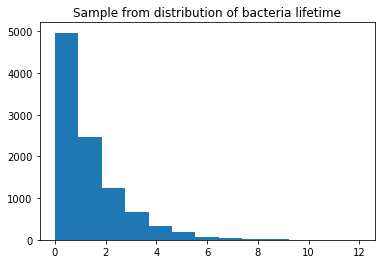

In [121]:
# let's repeat the experiment for 10K bacteria
ages = []
for t in range(10000):
    age = 0
    while np.random.randint(2) == 0: 
        age = age + 1
    ages.append(age)
plt.hist(ages, bins = max(ages)+1)
plt.title('Sample from distribution of bacteria lifetime');

## City sizes, internet memes, and Pareto law

Normal distribution is a result of adding independent variables, and it oftem emerges in systems with negative feedback or without feedback. But in society and economy there is often positive feedback. 

For example, the larger is the company budget, the more it can spend on advertizing, the more customers it has, the larger its budget... Or the more times a meme is reposted, the more eyes will see it, the more users will repost it... In general, the past reinforces the future, and this influence accumulates. 

Let' simulate the process of reposting the memes. Let's start from the situation of no reposts. 

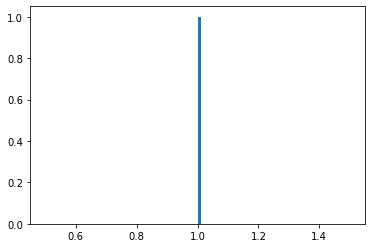

In [122]:
# 1000 memes, each one posted only once. 
repost_counts = [1]
new_meme_probability = 0.01
plt.hist(repost_counts, bins=100);

Every new user chooses a meme randomly (with probability roughly proportional to the number of occurrences of this meme), and reposts it. 

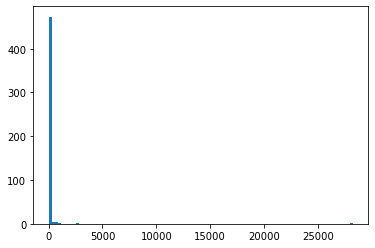

In [123]:
# add new users. Everyone reposts a random post or makes a new one, and its number of occurrences increases by 1. 
for i in range(50000):
    if np.random.uniform() < new_meme_probability:
        repost_counts.append(1)
    else:
        proba = np.array(repost_counts) + 10.0 # an additional factor that makes chances more equal
        proba /=  sum(proba)
        chosen_post = np.random.choice(len(repost_counts), p=proba)
        repost_counts[chosen_post] += 1
plt.hist(repost_counts, bins=100);

After repeating the process multiple times, we see that there are a few 'leader' memes that leave all the competitors far behind. 

The plot of ($1-CDF$) (and of $PDF$, if we knew it) for Pareto distribution is close to linear in log-log scale

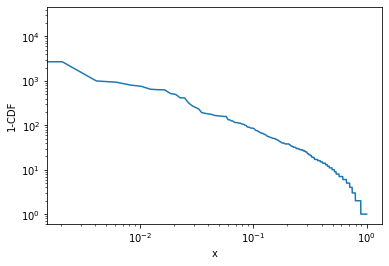

In [124]:
plt.plot(
    1 - np.linspace(0, 1, len(repost_counts)),
    sorted(repost_counts)
)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('x')
plt.ylabel('1-CDF');


The distributions of city sizes, personal incomes, and word occurences look pretty similar. 

# 4. Stock Prices data: example of modelling a distribution

In [125]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
%matplotlib inline

Here we download the data on the 500 top US public companies from a [website](https://datahub.io/core/s-and-p-500-companies-financials). 

In [129]:
url = 'https://datahub.io/core/s-and-p-500-companies-financials/r/constituents-financials.csv'
data = pd.read_csv(url)

Let's take a look at our data.

In [130]:
data.head()

,Symbol,Name,Sector,Price,Price/Earnings,Dividend Yield,Earnings/Share,52 Week Low,52 Week High,Market Cap,EBITDA,Price/Sales,Price/Book,SEC Filings
0,MMM,3M Company,Industrials,222.89,24.31,2.332862,7.92,259.77,175.490,138721055226,9.048000e+09,4.390271,11.34,http://www.sec.gov/cgi-bin/browse-edgar?action...
1,AOS,A.O. Smith Corp,Industrials,60.24,27.76,1.147959,1.70,68.39,48.925,10783419933,6.010000e+08,3.575483,6.35,http://www.sec.gov/cgi-bin/browse-edgar?action...
2,ABT,Abbott Laboratories,Health Care,56.27,22.51,1.908982,0.26,64.60,42.280,102121042306,5.744000e+09,3.740480,3.19,http://www.sec.gov/cgi-bin/browse-edgar?action...
3,ABBV,AbbVie Inc.,Health Care,108.48,19.41,2.499560,3.29,125.86,60.050,181386347059,1.031000e+10,6.291571,26.14,http://www.sec.gov/cgi-bin/browse-edgar?action...
4,ACN,Accenture plc,Information Technology,150.51,25.47,1.714470,5.44,162.60,114.820,98765855553,5.643228e+09,2.604117,10.62,http://www.sec.gov/cgi-bin/browse-edgar?action...


### Example of analysis of a variable

Let's take stock price and see how it is distributed. 

Here we will use some of magical `pandas` methods. In the 3rd week, you'll study them in more details on the Python course. 

From the basic statistics of our variable, we can see that it is asymmetric: mean is larger then the median, skewness is positive. Excess kurtosis is very large, and it may be due just to a few outliers. 

In [131]:
print(data['Price'].describe())
print(scipy.stats.skew(data['Price']))
print(scipy.stats.kurtosis(data['Price']))

count     505.000000
mean      103.830634
std       134.427636
min         2.820000
25%        46.250000
50%        73.920000
75%       116.540000
max      1806.060000
Name: Price, dtype: float64
7.283941618549149
72.55797838812464


I make a histogram of the data, but because of outliers it doesn't show me in much details its most common part. 

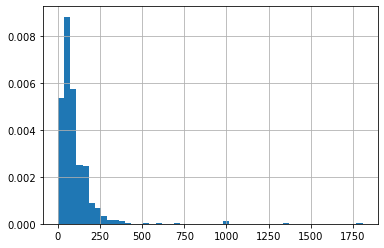

In [132]:
data['Price'].hist(bins=50, density=True);

Let's zoom in by plotting a histogram conditional on price being not too large.

It still looks asymmetric. 

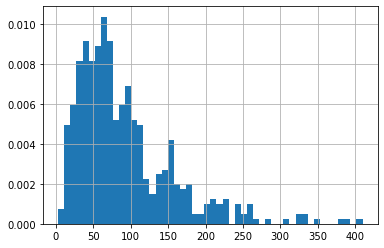

In [133]:
data['Price'][data['Price'] <= 500].hist(bins=50, density=True);

What kind of distribution function might describe this data? Maybe, Poisson? It's also positive and asymmetric.

Let's generate a sample from Poisson distribution and compare its properties with the properties of our data.

In [134]:
x = pd.Series(np.random.poisson(data['Price'].mean(), size=500))
print(x.describe())
print(scipy.stats.skew(x))
print(scipy.stats.kurtosis(x))

count    500.000000
mean     103.110000
std       10.016314
min       75.000000
25%       96.000000
50%      103.000000
75%      110.000000
max      162.000000
dtype: float64
0.3926613476938168
1.7933638459230101


Well, most of them don't coincide with the properties of our data. Median is too high; variance, skewness and kurtosis are too small.

And if we plot the histoframs of our distributions, we'll see that they are very different. 

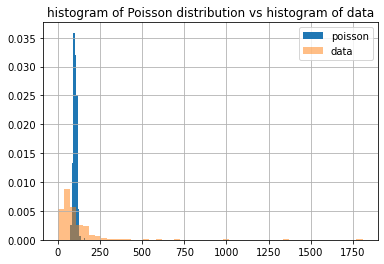

In [135]:
x.hist(density=True)
data['Price'].hist(density=True, bins=50, alpha=0.5)
plt.legend(['poisson', 'data'])
plt.title('histogram of Poisson distribution vs histogram of data');

Maybe, our distributions is then lognormal?

We could check this hypothesis by first plotting the histogram for the logarighm of our variable.

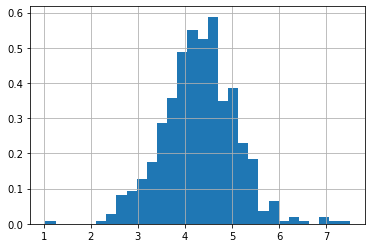

In [136]:
log_price = np.log(data['Price'])
log_price.hist(bins=30, density=True);

Well, at least it's symmetric. 

And it's quantiles are quite close to the quantiles of normal distribution with the same location and scale.

In [137]:
log_price.describe()

count    505.000000
mean       4.305372
std        0.780919
min        1.036737
25%        3.834061
50%        4.302983
75%        4.758235
max        7.498903
Name: Price, dtype: float64

In [138]:
z = pd.Series(np.random.normal(loc=log_price.mean(), scale=log_price.std(), size=500))
z.describe()

count    500.000000
mean       4.340113
std        0.771827
min        2.230740
25%        3.797962
50%        4.368255
75%        4.871869
max        6.595966
dtype: float64

Histograms of the two non-logarithmized distributions look similarly as well. 

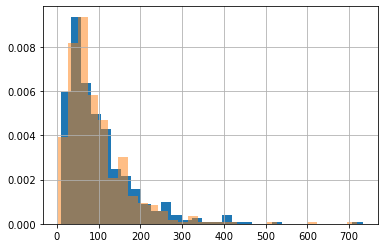

In [139]:
np.exp(z).hist(bins=30, density=True)
data['Price'][data['Price'] <= 1000].hist(bins=30, alpha=0.5, density=True);

Finally, let's make a q-q plot to compare all the quantiles.

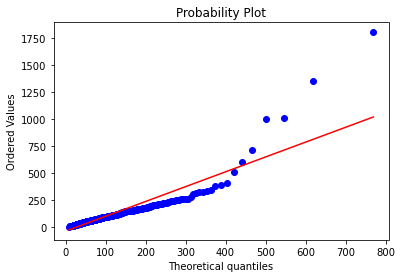

In [140]:
scipy.stats.probplot(
    data['Price'],
    dist=scipy.stats.lognorm(s=log_price.std(), scale=np.exp(log_price.mean()), loc=1),
    plot=plt
);

We see that all the quantiles up to 400 align with lognormal quantiles almost perfectly, but after that, a different trend is observed. 

It may mean that we in fact work with a mixture of two different distributions!

We can think than the largest ~10 points are outliers and just ignore them. 

Or we can assume we have two different log-normal distributions, and fit them to our data (in a naive way).  

In [141]:
threshold = 350

part1 = scipy.stats.lognorm(
    s=log_price[data['Price'] < threshold].std(), 
    scale=np.exp(log_price[data['Price'] < threshold].mean())
)
part2 = scipy.stats.lognorm(
    s=log_price[data['Price'] >= threshold].std(), 
    scale=np.exp(log_price[data['Price'] >= threshold].mean())
)
proportion = data['Price'] >= threshold

For a mixture, there is no straigthforward way to calculate quantiles, so instead we'll just sample from it several times, and see whether these samples on average resemble the expected values.

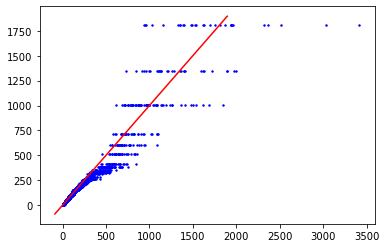

In [142]:
np.random.seed(1)
for i in range(30):
    sample = sorted(np.concatenate([
        part1.rvs(size=sum(data['Price'] < threshold)),
        part2.rvs(size=sum(data['Price'] >= threshold))
    ]))
    plt.scatter(sample, sorted(data['Price']), s=2, color='b')

plt.plot(plt.ylim(), plt.ylim(), color='r');

Well, on average our sampled distribution almost does align with the data (however, most of the plot lies dangerously below the diagonal). 

One more good idea is to look at the same plot in log scale. 

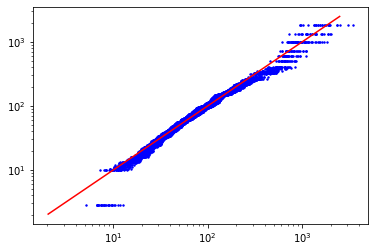

In [143]:
np.random.seed(1)
for i in range(30):
    sample = sorted(np.concatenate([
        part1.rvs(size=sum(data['Price'] < threshold)),
        part2.rvs(size=sum(data['Price'] >= threshold))
    ]))
    plt.scatter(sample, sorted(data['Price']), s=2, color='b')
    
plt.xscale('log')
plt.yscale('log')

plt.plot(plt.ylim(), plt.ylim(), color='r');

Here it looks more okay. There is a strange group of poits at the bottom - but it corresponts to only one original observation.

In [144]:
data['Price'].sort_values().head()

104     2.82
10     10.06
200    10.43
9      11.22
459    11.95
Name: Price, dtype: float64

By the way, stock prices seem to depend a lot on the sector. We can visualize it, but we won't go deeper here. 

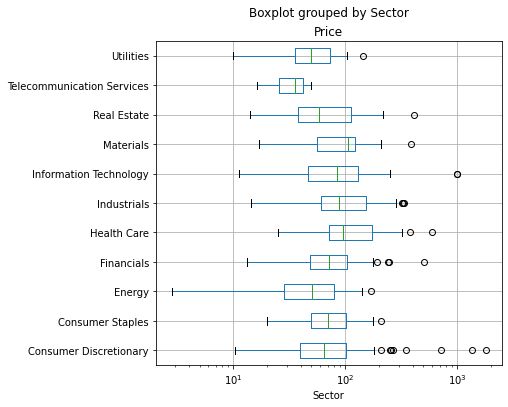

In [145]:
data.boxplot(column='Price', by='Sector', figsize=(6, 6), vert=False);
plt.xscale('log');

# 5. The assignment

Take two other variables from the same dataset, `EBITDA` and `Market Cap`. For each of them, 
* calculate descriptive statsistics and comment on them;
* try different ways of visualizing the variable;
* try to fit a 'theoretical' distribution for this variable. 

There is no single "right" way to do this assignment. 

But the more interesting observations you will make about the two variables, the better it would be.

# EBITDA

## Descriptive statsistics

In [356]:
# EBITDA
var = "EBITDA"
print("Data Sample:")
print(data[var].head(10))

print("\nHigh level stats:")
print(data[var].describe())
print("\nUnique values:")
print(data[var].nunique())
print("\nValue counts (top 10):")
print(data[var].value_counts().head(10))
print("\nSkew:")
print(scipy.stats.skew(data[var]))
print("\nKurtosis:")
print(scipy.stats.kurtosis(data[var]))

Data Sample:
0    9.048000e+09
1    6.010000e+08
2    5.744000e+09
3    1.031000e+10
4    5.643228e+09
5    2.704000e+09
6    5.878000e+08
7    2.538040e+09
8    8.539410e+08
9    3.390000e+08
Name: EBITDA, dtype: float64

High level stats:
count    5.050000e+02
mean     3.590328e+09
std      6.840544e+09
min     -5.067000e+09
25%      7.739320e+08
50%      1.614399e+09
75%      3.692749e+09
max      7.938600e+10
Name: EBITDA, dtype: float64

Unique values:
444

Value counts (top 10):
 0.000000e+00    58
 2.100000e+09     2
 6.790000e+08     2
 5.280000e+09     2
 3.992770e+08     2
 2.021400e+09     1
 3.884000e+09     1
 4.737000e+09     1
 1.448000e+09     1
-5.180000e+08     1
Name: EBITDA, dtype: int64

Skew:
5.406515968277326

Kurtosis:
40.868283473215264


#### Comments

A couple of simple conclusions:
* The values of the variable vary between large positive and negative values (between -5.067000e+09 and 7.938600e+10)
* Skews to the right so most values will be bigger than the mean
* Most of the values appear once some repetitions can be seen in var=0

## Visualization

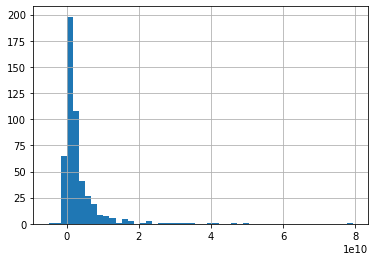

In [357]:
data[var].hist(bins=50);

Let's try to zoom in to have a better grasp on the distibution:

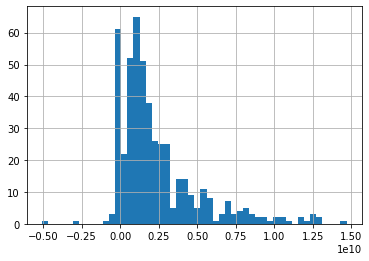

In [358]:
data[var][(data[var]<=1.5e+10)].hist(bins=50);

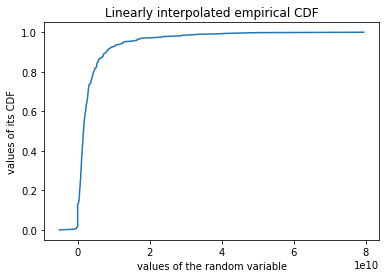

In [359]:
plt.plot(sorted(data[var]), np.linspace(0, 1, num=len(data[var])))
plt.xlabel('values of the random variable')
plt.ylabel('values of its CDF')
plt.title('Linearly interpolated empirical CDF');

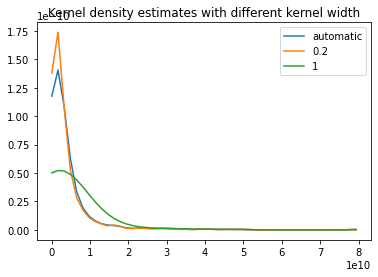

In [360]:
grid = np.linspace(0, data[var].max())
bandwidths = [None, 0.2, 1]
for bw in bandwidths:
    kde = scipy.stats.kde.gaussian_kde(data[var], bw_method=bw)
    plt.plot(grid, kde.evaluate(grid));
bandwidths[0] = 'automatic'
plt.legend(bandwidths)
plt.title('Kernel density estimates with different kernel width');

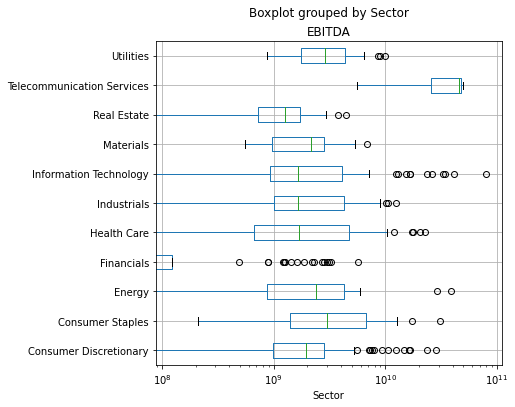

In [361]:
data.boxplot(column=var, by='Sector', figsize=(6, 6), vert=False);
plt.xscale('log');

### Theoretical Distributions

#### Lognormal

Seems similar to the example provided above with log normal distribution, lets try to find out:

/Users/adahan/opt/anaconda3/envs/py4dp/lib/python3.9/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/adahan/opt/anaconda3/envs/py4dp/lib/python3.9/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


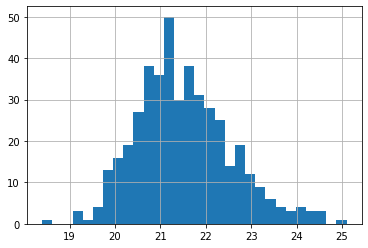

In [362]:
log_v = np.log(data[var])
log_v.value_counts()
log_v[log_v == -np.inf] = np.nan # Ignoring nan values due to log(0)
log_v.hist(bins=30);


Looking on the lognormal distibution seems to be pretty symmetric

In [363]:
log_v.describe()

count    438.000000
mean      21.509816
std        1.043499
min       18.395999
25%       20.793314
50%       21.375014
75%       22.160844
max       25.097588
Name: EBITDA, dtype: float64

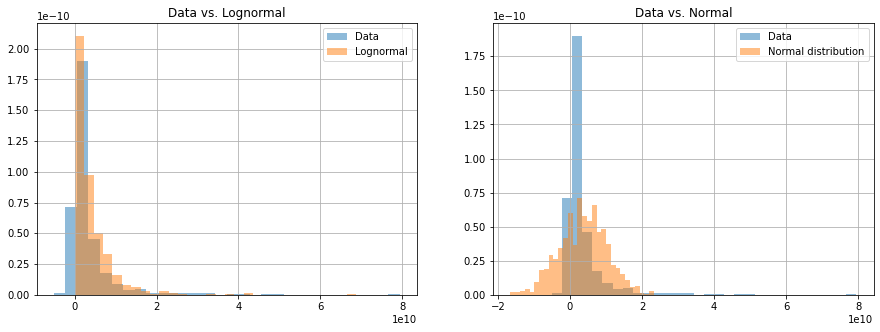

In [364]:
plt.figure(figsize=(15, 5))

# Lognormal vs. data
plt.subplot(1, 2, 1)
data[var].hist(density=True, bins=30, alpha=0.5)
exp = pd.Series(np.random.normal(loc=log_v.mean(), scale=log_v.std(), size=500))
np.exp(exp).hist(bins=30, density=True, alpha=0.5)
plt.legend(['Data', 'Lognormal'])
plt.title('Data vs. Lognormal')

# Normal vs. data
plt.subplot(1, 2, 2)
data[var].hist(density=True, bins=30, alpha=0.5)
norm = pd.Series(np.random.normal(loc=data[var].mean(), scale=data[var].std(), size=1000))
norm.hist(density=True, bins=30, alpha=0.5)
plt.legend(['Data', 'Normal distribution'])
plt.title('Data vs. Normal');

Lognormal seems to be fitted well to the data.

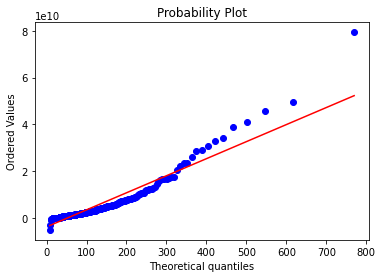

In [365]:
scipy.stats.probplot(
    data[var],
    dist=scipy.stats.lognorm(s=log_price.std(), scale=np.exp(log_price.mean()), loc=1),
    plot=plt
);

According to the QQ plot it seems that we were correct, we can assume that there is a small outlier after the 600 quantile (around 800)

# Market Cap

## Descriptive statsistics

In [366]:
# Market Cap
var = "Market Cap"
print("Data Sample:")
print(data[var].head(10))

print("\nHigh level stats:")
print(data[var].describe())
print("\nUnique values:")
print(data[var].nunique())
print("\nValue counts (top 10):")
print(data[var].value_counts().head(10))
print("\nSkew:")
print(scipy.stats.skew(data[var]))
print("\nKurtosis:")
print(scipy.stats.kurtosis(data[var]))

Data Sample:
0    138721055226
1     10783419933
2    102121042306
3    181386347059
4     98765855553
5     52518668144
6      6242377704
7     94550214268
8      8123611867
9     11191663795
Name: Market Cap, dtype: int64

High level stats:
count    5.050000e+02
mean     4.923944e+10
std      9.005017e+10
min      2.626102e+09
25%      1.273207e+10
50%      2.140095e+10
75%      4.511968e+10
max      8.095080e+11
Name: Market Cap, dtype: float64

Unique values:
505

Value counts (top 10):
138721055226    1
69661177770     1
21433781860     1
138652800000    1
20003317128     1
8030036023      1
13191507318     1
58782413951     1
22908130223     1
40543547441     1
Name: Market Cap, dtype: int64

Skew:
5.222656445413019

Kurtosis:
33.458549645236026


#### Comments

A couple of simple conclusions:
* The values of the variable are very high (between -5.067000e+09 and 7.938600e+10)
* Also in this variable the skews is to the right so most values will be bigger than the mean
* All the values are unique

## Visualization

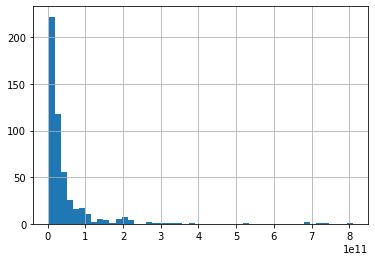

In [367]:
data[var].hist(bins=50);

Let's try to zoom in to have a better grasp on the distibution:

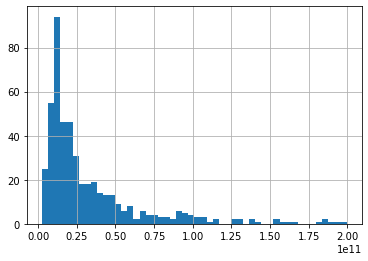

In [368]:
data[var][(data[var]<=2e+11)].hist(bins=50);

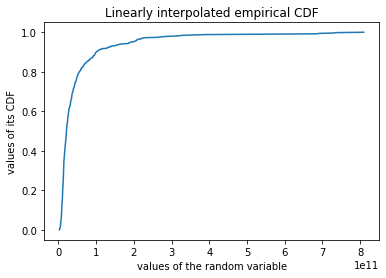

In [369]:
plt.plot(sorted(data[var]), np.linspace(0, 1, num=len(data[var])))
plt.xlabel('values of the random variable')
plt.ylabel('values of its CDF')
plt.title('Linearly interpolated empirical CDF');

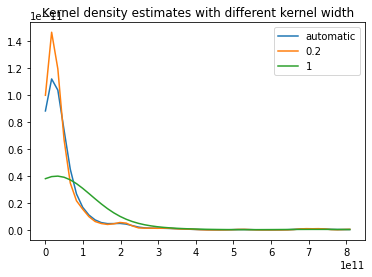

In [370]:
grid = np.linspace(0, data[var].max())
bandwidths = [None, 0.2, 1]
for bw in bandwidths:
    kde = scipy.stats.kde.gaussian_kde(data[var], bw_method=bw)
    plt.plot(grid, kde.evaluate(grid));
bandwidths[0] = 'automatic'
plt.legend(bandwidths)
plt.title('Kernel density estimates with different kernel width');

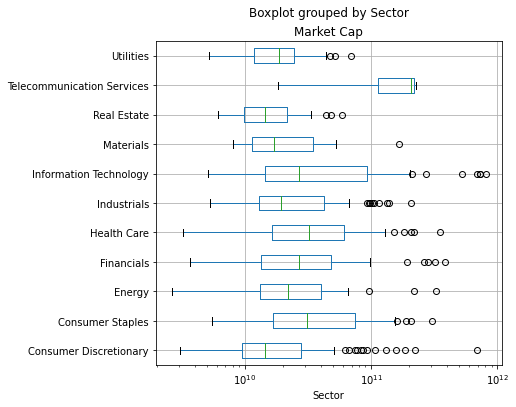

In [371]:
data.boxplot(column=var, by='Sector', figsize=(6, 6), vert=False);
plt.xscale('log');

### Theoretical Distributions

#### Lognormal

Histogram seems similar to the example provided above with log normal distribution, lets try to find out:

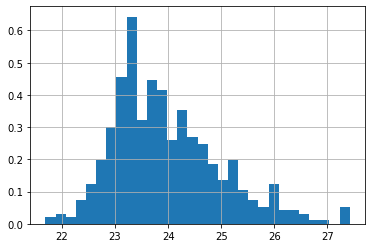

In [372]:
log_v = np.log(data[var])
log_v.value_counts()
log_v.hist(bins=30, density=True);


Looking on the lognormal distibution seems to be pretty symmetric

In [373]:
log_v.describe()

count    505.000000
mean      23.969487
std        1.011303
min       21.688767
25%       23.267390
50%       23.786701
75%       24.532584
max       27.419693
Name: Market Cap, dtype: float64

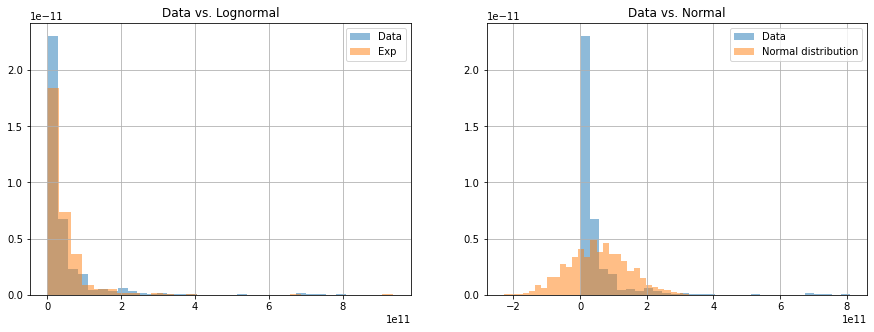

In [374]:
plt.figure(figsize=(15, 5))

# Lognormal vs. data
plt.subplot(1, 2, 1)
data[var].hist(density=True, bins=30, alpha=0.5)
exp = pd.Series(np.random.normal(loc=log_v.mean(), scale=log_v.std(), size=500))
np.exp(exp).hist(bins=30, density=True, alpha=0.5)
plt.legend(['Data', 'Exp'])
plt.title('Data vs. Lognormal')

# Normal vs. data
plt.subplot(1, 2, 2)
data[var].hist(density=True, bins=30, alpha=0.5)
norm = pd.Series(np.random.normal(loc=data[var].mean(), scale=data[var].std(), size=1000))
norm.hist(density=True, bins=30, alpha=0.5)
plt.legend(['Data', 'Normal distribution'])
plt.title('Data vs. Normal');

Lognormal seems to fit the data here as well pretty good

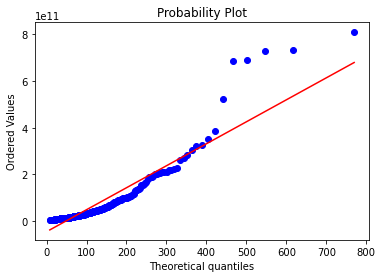

In [375]:
scipy.stats.probplot(
    data[var],
    dist=scipy.stats.lognorm(s=log_price.std(), scale=np.exp(log_price.mean()), loc=1),
    plot=plt
);

Here, the number of outliers are bigger (6 samples~).

It may mean that we in fact work with a mixture of two different distributions.

I'll assume these are just ourliers as these are less than 1.2% of our samples data.